In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

import os

In [2]:
train = pd.read_csv(os.getcwd()+'/train.csv')
test = pd.read_csv(os.getcwd()+'/test.csv')

In [3]:
train.head()

,date_time,deg_C,relative_humidity,absolute_humidity,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,target_carbon_monoxide,target_benzene,target_nitrogen_oxides
0,2010-03-10 18:00:00,13.1,46.0,0.7578,1387.2,1087.8,1056.0,1742.8,1293.4,2.5,12.0,167.7
1,2010-03-10 19:00:00,13.2,45.3,0.7255,1279.1,888.2,1197.5,1449.9,1010.9,2.1,9.9,98.9
2,2010-03-10 20:00:00,12.6,56.2,0.7502,1331.9,929.6,1060.2,1586.1,1117.0,2.2,9.2,127.1
3,2010-03-10 21:00:00,11.0,62.4,0.7867,1321.0,929.0,1102.9,1536.5,1263.2,2.2,9.7,177.2
4,2010-03-10 22:00:00,11.9,59.0,0.7888,1272.0,852.7,1180.9,1415.5,1132.2,1.5,6.4,121.8


In [4]:
train.date_time = pd.to_datetime(train.date_time)
test.date_time = pd.to_datetime(test.date_time)

In [5]:
target_cols = ['target_carbon_monoxide', 'target_benzene', 'target_nitrogen_oxides']
feature_cols = train.columns.difference(target_cols+['date_time'])
feature_cols

Index(['absolute_humidity', 'deg_C', 'relative_humidity', 'sensor_1',
       'sensor_2', 'sensor_3', 'sensor_4', 'sensor_5'],
      dtype='object')

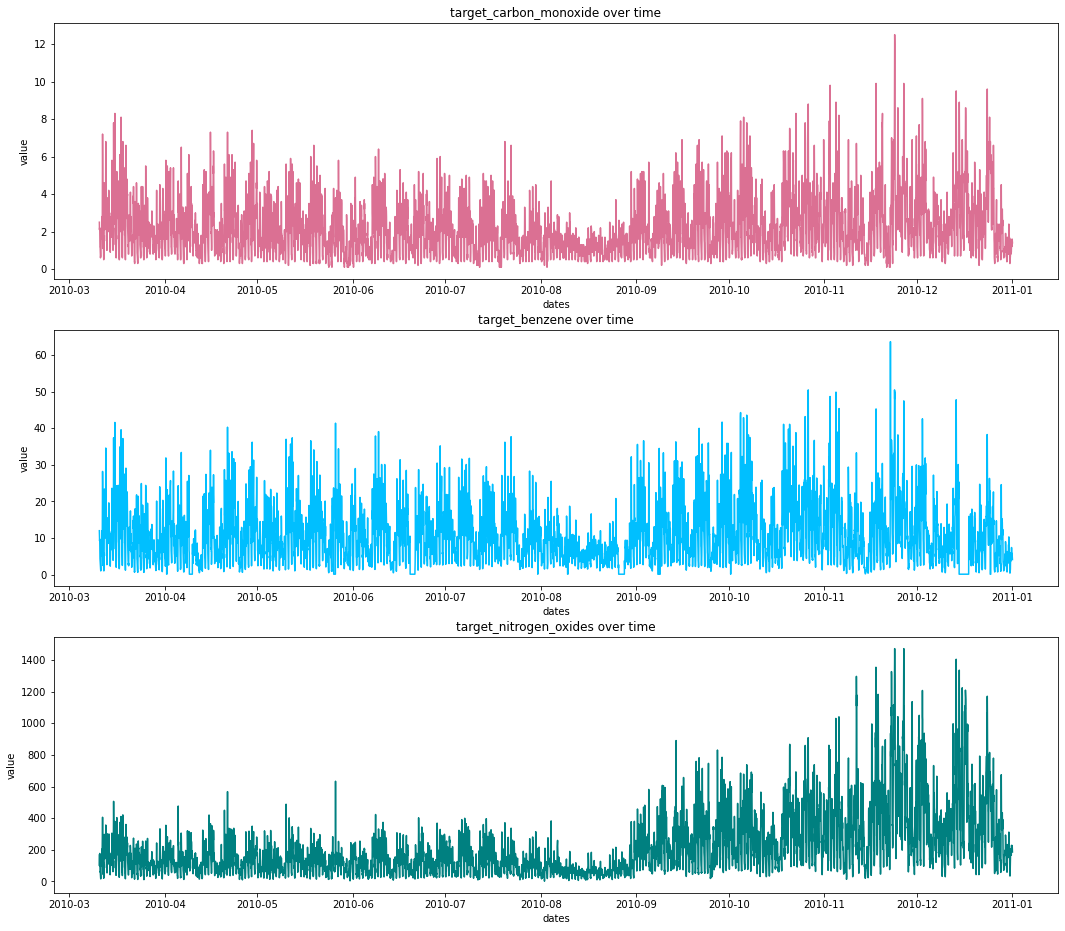

In [6]:
fig, axs = plt.subplots(figsize = (18, 16), ncols = 1, nrows = 3)
colors = ["palevioletred", "deepskyblue", "teal"]

for i in range(3):
    axs[i].plot(train.date_time, train[target_cols[i]], color = colors[i])
    axs[i].set_title(f'{target_cols[i]} over time')
    axs[i].set_xlabel('dates')
    axs[i].set_ylabel('value')

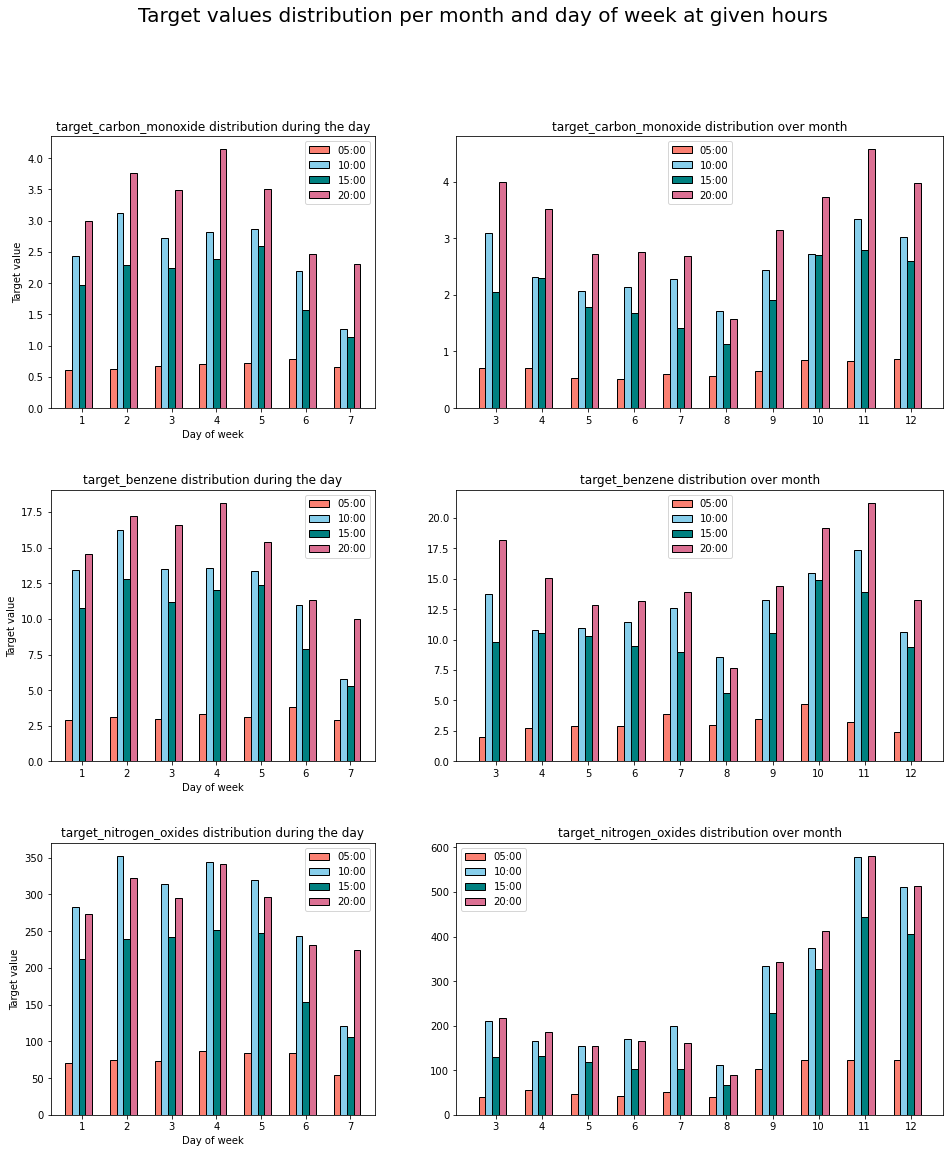

In [7]:
hours = [5, 10, 15, 20]

ht = train.loc[train.date_time.dt.hour.isin(hours)].copy()

fig, axs = plt.subplots(figsize=(16, 18), ncols=2, nrows=3, sharex=False,
                        gridspec_kw={'width_ratios': [1, 1.5]})

fig.suptitle("Target values distribution per month and day of week at given hours", fontsize=20)

plt.subplots_adjust(hspace = 0.3)
width=0.15
x = np.sort(ht.date_time.dt.day_of_week.unique()) + 1

for i in range(3):
    bar1 = axs[i, 0].bar(x-2*width, ht[ht.date_time.dt.hour==5].groupby(ht.date_time.dt.day_of_week)[target_cols[i]].mean(), width=width, 
               edgecolor="black", label="05:00", color="salmon")
    bar2 = axs[i, 0].bar(x-width, ht[ht.date_time.dt.hour==10].groupby(ht.date_time.dt.day_of_week)[target_cols[i]].mean(), width=width, 
               edgecolor="black", label="10:00", color="skyblue")
    bar3 = axs[i, 0].bar(x, ht[ht.date_time.dt.hour==15].groupby(ht.date_time.dt.day_of_week)[target_cols[i]].mean(), width=width, 
               edgecolor="black", label="15:00", color="teal")
    bar4 = axs[i, 0].bar(x+width, ht[ht.date_time.dt.hour==20].groupby(ht.date_time.dt.day_of_week)[target_cols[i]].mean(), width=width, 
               edgecolor="black", label="20:00", color="palevioletred")
    
    axs[i, 0].set_title(f'{target_cols[i]} distribution during the day')
    axs[i, 0].set_xlabel('Day of week')
    axs[i, 0].set_ylabel('Target value')
    axs[i, 0].set_xticks(x)
    axs[i, 0].legend(fontsize = 10)
    
x = np.sort(ht.date_time.dt.month.unique())
for i in range(3):
    bar1 = axs[i, 1].bar(x-2*width, ht[ht.date_time.dt.hour == 5].groupby(ht.date_time.dt.month)[target_cols[i]].mean(),width = width,
                edgecolor = 'black', label = '05:00', color = 'salmon')
    bar2 = axs[i, 1].bar(x-width, ht[ht.date_time.dt.hour==10].groupby(ht.date_time.dt.month)[target_cols[i]].mean(), width=width, 
               edgecolor="black", label="10:00", color="skyblue")
    bar3 = axs[i, 1].bar(x, ht[ht.date_time.dt.hour==15].groupby(ht.date_time.dt.month)[target_cols[i]].mean(), width=width, 
               edgecolor="black", label="15:00", color="teal")
    bar4 = axs[i, 1].bar(x+width, ht[ht.date_time.dt.hour==20].groupby(ht.date_time.dt.month)[target_cols[i]].mean(), width=width, 
               edgecolor="black", label="20:00", color="palevioletred")
    axs[i, 1].set_title(f'{target_cols[i]} distribution over month')
    axs[i, 1].set_xlabel = ('Month')
    axs[i, 1].set_ylabel = ('Target value')
    axs[i, 1].set_xticks(x)
    axs[i, 1].legend(fontsize = 10)

In [8]:
df = pd.concat([train, test]).reset_index(drop = True)

#### It can be seen from the plots above that there is some sine relationship between target variables and month/day of the year

In [9]:
df['month'] = df.date_time.dt.month
df['summer'] = df['month'].isin([6,7,8]).astype(int)
df['autumn'] = df['month'].isin([9,10,11]).astype(int)
df['winter'] = df['month'].isin([12,1,2]).astype(int)
df['spring'] = df['month'].isin([3,4,5]).astype(int)
df['weekend'] = (df.date_time.dt.day_of_week>=5).astype(int)
df['morning'] = (df.date_time.dt.hour.isin(np.arange(5,12,1))).astype(int)
df['daytime'] = (df.date_time.dt.hour.isin(np.arange(12,18,1))).astype(int)
df['night'] = (df.date_time.dt.hour.isin(np.concatenate((np.arange(18,24,1), np.arange(0, 5,1 )), axis = 0))).astype(int)

### Now let's take a look at correlations between variables

Text(0.5, 1.0, 'Correlation between features')

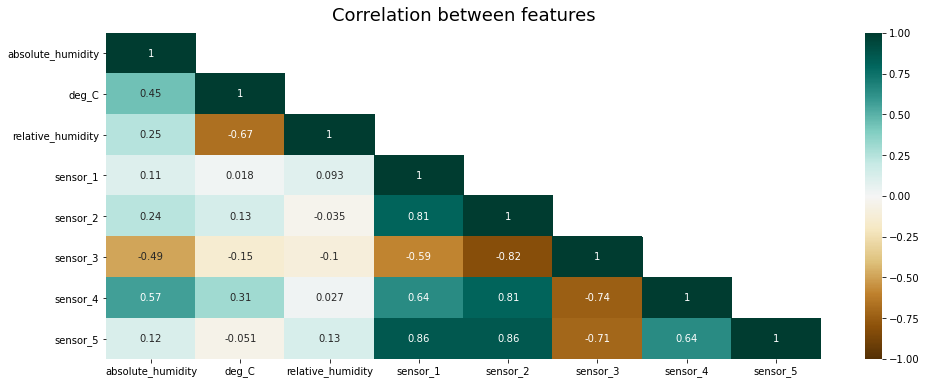

In [10]:
plt.figure(figsize = (16,6))

mask = np.triu(np.ones_like(train[feature_cols].corr(), dtype=bool), +1)
heatmap = sns.heatmap(train[feature_cols].corr(), vmin = -1, vmax = 1, mask = mask, annot = True, cmap = 'BrBG')

heatmap.set_title('Correlation between features', fontsize = 18, pad = 12)

Text(0.5, 1.0, 'Correlation between all variables')

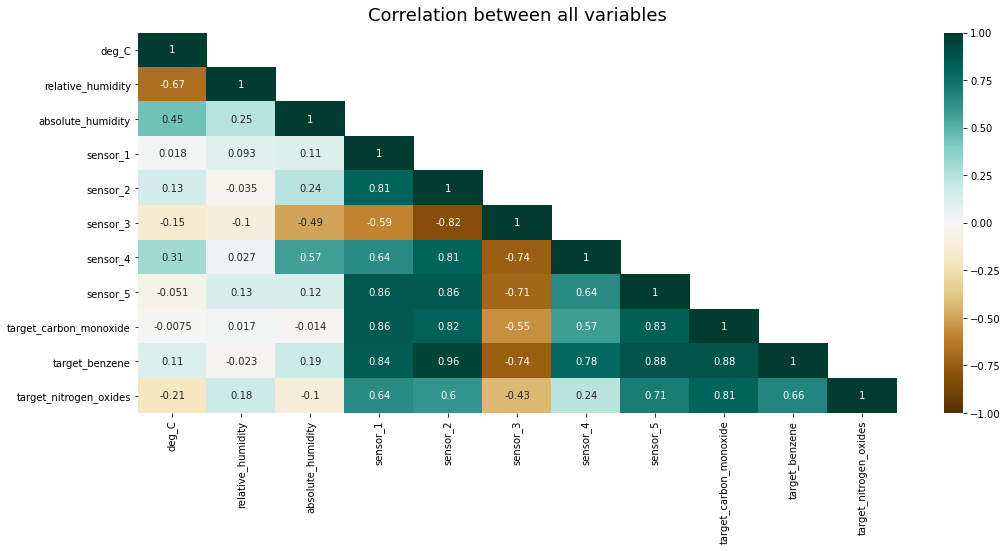

In [11]:
plt.figure(figsize = (17,7))

mask = np.triu(np.ones_like(train.corr(), dtype=bool), +1)
heatmap = sns.heatmap(train.corr(), vmin = -1, vmax = 1, mask = mask, annot = True, cmap = 'BrBG')

heatmap.set_title('Correlation between all variables', fontsize = 18, pad = 12)

In [12]:
corr_list_max = []
corr_list_min = []
train_copy = train.drop('date_time', axis = 1).copy()
for i in range(train_copy.shape[1]):
    t = train_copy.copy()
    t.iloc[:,i] = t.iloc[:,i].shift(fill_value = 0)
    cr = t.corr()
    corr_list_max.append((cr.iloc[i, :].drop(labels = train_copy.columns[i]).idxmax(), train_copy.columns[i], 
                      cr.iloc[i, :].drop(labels = train_copy.columns[i]).max()))
    corr_list_min.append((cr.iloc[i, :].drop(labels = train_copy.columns[i]).idxmin(), train_copy.columns[i], 
                      cr.iloc[i, :].drop(labels = train_copy.columns[i]).min()))
    
    

In [13]:
for elem in corr_list_max:
    el1, el2, el3 = elem
    print('{:<40}{:<30}{}'.format(el1, el2, el3))

absolute_humidity                       deg_C                         0.44720961780040824
absolute_humidity                       relative_humidity             0.23826190896974064
sensor_4                                absolute_humidity             0.5402758202259511
sensor_5                                sensor_1                      0.78170080036629
target_benzene                          sensor_2                      0.8215104925069341
relative_humidity                       sensor_3                      -0.0816033640832157
sensor_2                                sensor_4                      0.7038549355097165
sensor_1                                sensor_5                      0.738600361727798
sensor_5                                target_carbon_monoxide        0.7363092608156102
sensor_2                                target_benzene                0.8242198358442938
target_carbon_monoxide                  target_nitrogen_oxides        0.7221030304428554


In [14]:
for elem in corr_list_min:
    el1, el2, el3 = elem
    print('{:<40}{:<30}{}'.format(el1, el2, el3))

relative_humidity                       deg_C                         -0.6461035651780417
deg_C                                   relative_humidity             -0.6459992825369335
sensor_3                                absolute_humidity             -0.4598739116334728
sensor_3                                sensor_1                      -0.529632785829922
sensor_3                                sensor_2                      -0.7386430839179281
sensor_2                                sensor_3                      -0.7233063809574053
sensor_3                                sensor_4                      -0.6745653848698829
sensor_3                                sensor_5                      -0.6279716669068576
sensor_3                                target_carbon_monoxide        -0.47102149238448515
sensor_3                                target_benzene                -0.6606362813263051
sensor_3                                target_nitrogen_oxides        -0.3861627778545344


In [15]:
lagged = []

for feat in feature_cols:
    new_feat = feat+'_lag'
    df[new_feat] = df[feat].shift(fill_value = 0)
    lagged.append(new_feat)

In [16]:
train_y = df.loc[:train.shape[0]-1, target_cols].copy()
train_X = df.loc[:train.shape[0]-1, df.columns.difference(target_cols)].copy()
test_X = df.loc[train.shape[0]:, df.columns.difference(target_cols)].reset_index(drop = True).copy()

## Modelling

In [17]:
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_log_error
from sklearn.model_selection import StratifiedKFold, StratifiedShuffleSplit
from sklearn.ensemble import IsolationForest

In [18]:
train_y = np.log(train_y)

In [19]:
cb_params = [
                {'learning_rate': 0.04094650317955774,
                 'l2_leaf_reg': 8.555213318408395,
                 'bagging_temperature': 4.188124681571345,
                 'random_strength': 1.444399265342111,
                 'depth': 8,
                 'grow_policy': 'Lossguide',
                 'leaf_estimation_method': 'Gradient'},
                {'learning_rate': 0.010499552543881853,
                 'l2_leaf_reg': 2.630654006362146,
                 'bagging_temperature': 4.824439111895089,
                 'random_strength': 1.3480005087465852,
                 'depth': 4,
                 'grow_policy': 'Lossguide',
                 'leaf_estimation_method': 'Newton'},
               {'learning_rate': 0.010202325317933652,
                'l2_leaf_reg': 0.9134009064920859,
                'bagging_temperature': 8.535456442729302,
                'random_strength': 1.353469950151128,
                'depth': 10,
                'grow_policy': 'Lossguide',
                'leaf_estimation_method': 'Newton'},
            ]

In [20]:
all_fi = []

splits = 10

# Initializing and filling predictions dataframe with datetime values
preds = pd.DataFrame()
preds["date_time"] = test_X["date_time"].copy()

# The months will be used for folds split
months = train_X.drop(7110, axis=0)["date_time"].dt.month

total_mean_rmsle = 0

X = pd.DataFrame()

train_X.drop([7110], axis = 0, inplace = True)
train_y.drop([7110], axis = 0, inplace = True)

for i, target in enumerate(target_cols):
    print(f"\nTraining for {target}...")

    # Getting dataset for a current target in case different datasets should be used for different targets
#     X, X_test, y = prepare_dataset(train_copy, test_copy, i)
    y = train_y.iloc[:,i]
    skf = StratifiedKFold(n_splits=splits, shuffle=True, random_state=42)
    oof_preds = np.zeros((train_X.shape[0],))
    model_preds = 0
    model_fi = 0
    for num, (train_idx, valid_idx) in enumerate(skf.split(train_X, months)):
        X_train, X_valid = train_X.loc[train_idx], train_X.loc[valid_idx]
        y_train, y_valid = y.loc[train_idx], y.loc[valid_idx]
        model = CatBoostRegressor(random_state=42,
                                 thread_count=4,
                                 verbose=False,
                                 loss_function='RMSE',
                                 eval_metric='RMSE',
                                 od_type="Iter",
                                 early_stopping_rounds=500,
                                 use_best_model=True,
                                 iterations=10000,
                                 **cb_params[i])
        model.fit(X_train, y_train,
                  eval_set=(X_valid, y_valid),
                  verbose=False,
                  cat_features=["night", "weekend", "morning"])
        model_preds += np.exp(model.predict(test_X)) / splits
        model_fi += model.feature_importances_
        oof_preds[valid_idx] = np.exp(model.predict(X_valid))
        oof_preds[oof_preds < 0] = 0
        print(f"Fold {num} RMSLE: {np.sqrt(mean_squared_log_error(np.exp(y_valid), oof_preds[valid_idx]))}")
#         print(f"Trees: {model.tree_count_}")
    target_rmsle = np.sqrt(mean_squared_log_error(np.exp(y), oof_preds))
    total_mean_rmsle += target_rmsle / len(target_cols)
    print(f"\nOverall {target} RMSLE: {target_rmsle}")    
    preds[target] = model_preds
    all_fi.append(dict(zip(test_X.columns, model_fi)))
print(f"\n\nTotal RMSLE is {total_mean_rmsle}\n")


Training for target_carbon_monoxide...
Fold 0 RMSLE: 0.10258944372602422
Fold 1 RMSLE: 0.09280572216033992
Fold 2 RMSLE: 0.10085057484285562
Fold 3 RMSLE: 0.09589105909574525
Fold 4 RMSLE: 0.09210514288124344
Fold 5 RMSLE: 0.09621907880673664
Fold 6 RMSLE: 0.08723444850420152
Fold 7 RMSLE: 0.09892748647347609
Fold 8 RMSLE: 0.0987373721690222
Fold 9 RMSLE: 0.0941885627184215

Overall target_carbon_monoxide RMSLE: 0.09605308363480305

Training for target_benzene...
Fold 0 RMSLE: 0.07822385298537006
Fold 1 RMSLE: 0.0804583209907528
Fold 2 RMSLE: 0.08237858250659683
Fold 3 RMSLE: 0.08073212561916356
Fold 4 RMSLE: 0.08130173525238096
Fold 5 RMSLE: 0.0805312489213579
Fold 6 RMSLE: 0.07999118620593676
Fold 7 RMSLE: 0.08093512454914382
Fold 8 RMSLE: 0.0806252494347655
Fold 9 RMSLE: 0.08014225320644701

Overall target_benzene RMSLE: 0.08053817083534802

Training for target_nitrogen_oxides...
Fold 0 RMSLE: 0.1895218103641727
Fold 1 RMSLE: 0.1912791115364236
Fold 2 RMSLE: 0.20829691482399315
Fol

In [21]:
preds

,date_time,target_carbon_monoxide,target_benzene,target_nitrogen_oxides
0,2011-01-01 00:00:00,1.463581,5.317667,137.682895
1,2011-01-01 01:00:00,1.876750,7.349698,180.254256
2,2011-01-01 02:00:00,1.546282,6.587133,154.457659
3,2011-01-01 03:00:00,1.911788,7.709659,190.088088
4,2011-01-01 04:00:00,1.340553,5.967525,133.319591
...,...,...,...,...
2242,2011-04-04 10:00:00,2.722345,13.751395,319.730066
2243,2011-04-04 11:00:00,2.104697,10.960459,230.082288
2244,2011-04-04 12:00:00,2.110006,12.589949,225.044378
2245,2011-04-04 13:00:00,1.856173,10.245502,191.830031


In [26]:
feature_list = set()
for i in np.arange(len(all_fi)):
    feature_list = set.union(feature_list, set(all_fi[i].keys()))

In [33]:
df = pd.DataFrame(columns=["Feature"])
df["Feature"] = list(feature_list)

for i in range(len(all_fi)):
    for key in all_fi[i]:
        df.loc[df['Feature']==key, 'Importance_'+str(i+1)] = all_fi[i][key]/1000
        
df.fillna(0, inplace= True)
df.sort_values('Importance_1', axis = 0, ascending = False, inplace=True)

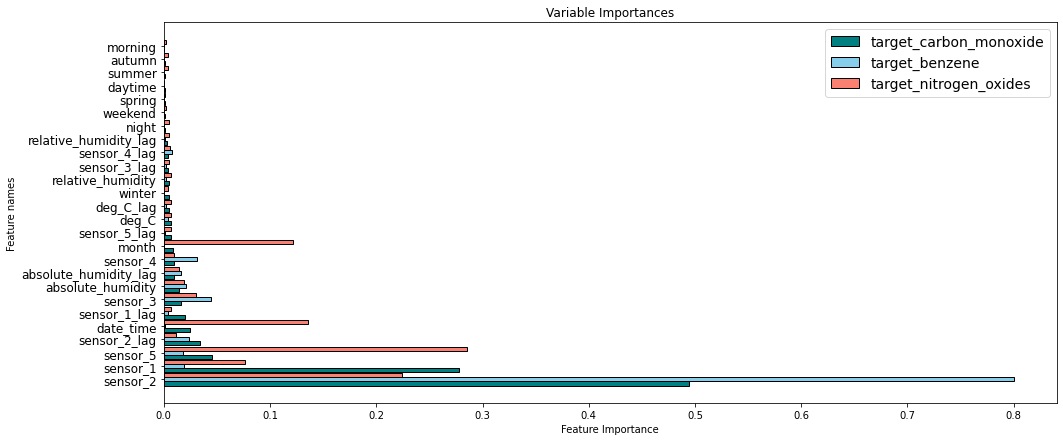

In [45]:
x = np.arange(len(df.Feature))
height = .3

fig, ax = plt.subplots(figsize = (16,7))

bar1 = ax.barh(x-height, df['Importance_1'], height = height, color = 'teal', label = target_cols[0], edgecolor = 'black')

bar2 = ax.barh(x, df['Importance_2'], height = height, color = 'skyblue', label = target_cols[1], edgecolor = 'black')    

bar3 = ax.barh(x+height, df['Importance_3'], height = height, color = 'salmon', label = target_cols[2], edgecolor = 'black')

ax.set_title('Variable Importances')
ax.set_xlabel('Feature Importance')
ax.set_ylabel('Feature names')
ax.set_yticks(x)
ax.set_yticklabels(df.Feature, fontsize = 12)

ax.legend(fontsize = 14, loc = 'upper right')


In [51]:
preds.to_csv('submission.csv', index = False)

In [48]:
preds.head()

,date_time,target_carbon_monoxide,target_benzene,target_nitrogen_oxides
0,2011-01-01 00:00:00,1.463581,5.317667,137.682895
1,2011-01-01 01:00:00,1.876750,7.349698,180.254256
2,2011-01-01 02:00:00,1.546282,6.587133,154.457659
3,2011-01-01 03:00:00,1.911788,7.709659,190.088088
4,2011-01-01 04:00:00,1.340553,5.967525,133.319591
